In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential#import keras sequential models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Lambda, MaxPooling2D # core layers
from keras.layers import BatchNormalization#batch normalisation for interlayer outputs
from keras.preprocessing.image import ImageDataGenerator#allows the model to recieve new variations of data at each epoch
from keras.utils import to_categorical#to convert data to binary matrix
from keras.callbacks import ReduceLROnPlateau#to reduce model learning rate when accuracy has stopped improving


In [ ]:
#reading training data into the dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#printing info about the dataset
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


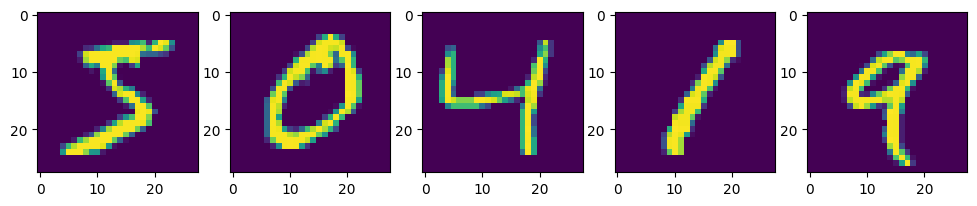

In [ ]:
#visualising data by reshaping and interpolating

%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 5, 1
for i in range(5):
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [ ]:
#normalising data by dividing by 255
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=13)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25)) ,
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.0001)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        )

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 64)        36928     
                                                      

In [ ]:
# Fit the ImageDataGenerator class to the training data
datagen.fit(x_train)

# Train the model
h = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(x_val, y_val),
                              verbose=1, steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction],
                              )

Epoch 1/20


<ipython-input-68-df2a569c58a6>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),


843/843 [==============================] - ETA: 0s - loss: 0.2692 - accuracy: 0.9153

843/843 [==============================] - 181s 212ms/step - loss: 0.2692 - accuracy: 0.9153 - val_loss: 0.0495 - val_accuracy: 0.9858 - lr: 0.0010
Epoch 2/20
843/843 [==============================] - ETA: 0s - loss: 0.0931 - accuracy: 0.9712

843/843 [==============================] - 173s 205ms/step - loss: 0.0931 - accuracy: 0.9712 - val_loss: 0.0528 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 3/20
843/843 [==============================] - ETA: 0s - loss: 0.0728 - accuracy: 0.9779

843/843 [==============================] - 174s 206ms/step - loss: 0.0728 - accuracy: 0.9779 - val_loss: 0.0288 - val_accuracy: 0.9915 - lr: 0.0010
Epoch 4/20
843/843 [==============================] - ETA: 0s - loss: 0.0638 - accuracy: 0.9803

843/843 [==============================] - 176s 209ms/step - loss: 0.0638 - accuracy: 0.9803 - val_loss: 0.0273 - val_accuracy: 0.9925 - lr: 0.0010
Epoch 5/20
843/843 [==============================] - ETA: 0s - loss: 0.0530 - accuracy: 0.9827

843/843 [==============================] - 182s 216ms/step - loss: 0.0530 - accuracy: 0.9827 - val_loss: 0.0338 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 6/20
843/843 [==============================] - ETA: 0s - loss: 0.0501 - accuracy: 0.9846

843/843 [==============================] - 184s 218ms/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0244 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 7/20
843/843 [==============================] - ETA: 0s - loss: 0.0500 - accuracy: 0.9850

843/843 [==============================] - 185s 219ms/step - loss: 0.0500 - accuracy: 0.9850 - val_loss: 0.0448 - val_accuracy: 0.9878 - lr: 0.0010
Epoch 8/20
843/843 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9869

843/843 [==============================] - 186s 220ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0268 - val_accuracy: 0.9928 - lr: 0.0010
Epoch 9/20
843/843 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9872

843/843 [==============================] - 178s 211ms/step - loss: 0.0425 - accuracy: 0.9872 - val_loss: 0.0390 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 10/20
843/843 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.9880

843/843 [==============================] - 170s 202ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0320 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 11/20
843/843 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 0.9889

843/843 [==============================] - 171s 202ms/step - loss: 0.0375 - accuracy: 0.9889 - val_loss: 0.0194 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 12/20
843/843 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9890

843/843 [==============================] - 171s 202ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0181 - val_accuracy: 0.9960 - lr: 0.0010
Epoch 13/20
843/843 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 0.9891

843/843 [==============================] - 171s 203ms/step - loss: 0.0361 - accuracy: 0.9891 - val_loss: 0.0219 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 14/20
843/843 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 0.9900

843/843 [==============================] - 171s 203ms/step - loss: 0.0341 - accuracy: 0.9900 - val_loss: 0.0306 - val_accuracy: 0.9930 - lr: 0.0010
Epoch 15/20
843/843 [==============================] - ETA: 0s - loss: 0.0348 - accuracy: 0.9895

843/843 [==============================] - 170s 201ms/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0270 - val_accuracy: 0.9925 - lr: 0.0010
Epoch 16/20
843/843 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9902

843/843 [==============================] - 172s 204ms/step - loss: 0.0331 - accuracy: 0.9902 - val_loss: 0.0216 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 17/20
843/843 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9898

843/843 [==============================] - 172s 204ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0198 - val_accuracy: 0.9960 - lr: 0.0010
Epoch 18/20
843/843 [==============================] - ETA: 0s - loss: 0.0311 - accuracy: 0.9912

843/843 [==============================] - 179s 212ms/step - loss: 0.0311 - accuracy: 0.9912 - val_loss: 0.0189 - val_accuracy: 0.9958 - lr: 0.0010
Epoch 19/20
843/843 [==============================] - ETA: 0s - loss: 0.0320 - accuracy: 0.9906

843/843 [==============================] - 174s 207ms/step - loss: 0.0320 - accuracy: 0.9906 - val_loss: 0.0263 - val_accuracy: 0.9923 - lr: 0.0010
Epoch 20/20
843/843 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9906

843/843 [==============================] - 176s 208ms/step - loss: 0.0309 - accuracy: 0.9906 - val_loss: 0.0224 - val_accuracy: 0.9955 - lr: 0.0010


In [ ]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.022417, final accuracy: 0.995500
